# Spotify Wrapped: Exploratory Data Analysis Project

In this project, I have delved into my Spotify usage Spotify Wrapped. Spotify is renowned as one of the most popular and widely used music streaming platforms. The dataset utilized here represents my personal usage of this platform.

The dataset provides insights into the following aspects:

The songs I have played
The artists behind those songs
The duration of my usage, and more
I obtained this dataset by downloading my personal usage data from Spotify's Privacy Setting section. Spotify allows users to access and download their personal usage data, and it typically takes up to 30 days to receive the complete dataset. Fortunately, I received my entire history within a maximum of 23 days, but generally, it may take the full 30-day duration. With this dataset at hand, I aim to analyze my streaming history and extract valuable insights from it.

## 0. Imports

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 112.6/151.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 1. Downloading the Dataset

One can can download the ZIP file with a copy of most of the personal data by using the automated Download your data function on the Privacy Settings section of account page in Spotify.

Instructions for downloading the dataset
   1. Go to the Privacy Settting Page of your Spotify Account.
   2. Scroll to the bottom and you'll see a section called Download Your Data.
   3. You'll see a three step process with instruction to download the data.
   4. You have to to Request for your data the you'll get an confirmation email from Spotify to Confirm the request.
   5. After collecting the required information, Spotify will create a Zip File and send you an email with the link to download       it.
   6. If you can't find the email, you can request again from your Privacy Settting Page.
   
For More Information: https://support.spotify.com/us/article/data-rights-and-privacy-settings/

### 1.1 Read the data

In [14]:
spotify_df=pd.read_json(r"C:\Users\sawra\spotify\Streaming_History_Audio_2023.json")

In [15]:
spotify_df.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2023-01-06T14:15:42Z,31k4xbqhsw7unisqoe62lohjknma,ios,154275,IN,106.197.9.194,unknown,Zehen,Mitraz,Zehen,...,None,None,None,clickrow,trackdone,False,False,False,1673014387,False
1,2023-01-06T14:16:23Z,31k4xbqhsw7unisqoe62lohjknma,ios,39832,IN,106.197.9.194,unknown,Mehboob,Mitraz,Zehen,...,None,None,None,trackdone,endplay,False,True,False,1673014542,False
2,2023-01-06T14:19:00Z,31k4xbqhsw7unisqoe62lohjknma,ios,156680,IN,106.197.9.194,unknown,Enna Sona,Mitraz,Enna Sona,...,None,None,None,clickrow,endplay,False,True,False,1673014583,False
3,2023-01-06T14:21:24Z,31k4xbqhsw7unisqoe62lohjknma,ios,140805,IN,106.197.9.194,unknown,Teri Rahaan,Mitraz,Teri Rahaan,...,None,None,None,trackdone,endplay,False,True,False,1673014741,False
4,2023-01-06T14:24:29Z,31k4xbqhsw7unisqoe62lohjknma,ios,168642,IN,106.197.9.194,unknown,Lage Nahi Man,Vismay Patel,Lage Nahi Man,...,None,None,None,clickrow,endplay,False,True,False,1673014897,False


In [7]:
df.shape

(2809, 21)

# 2. Data Preparation and Cleaning

## 2.1 Prepare the data

In [18]:
spotify_df.to_csv(r"C:\Users\sawra\spotify\Streaming_History_Audio_2023.csv", index=False)


In [19]:
spotify_df

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2023-01-06T14:15:42Z,31k4xbqhsw7unisqoe62lohjknma,ios,154275,IN,106.197.9.194,unknown,Zehen,Mitraz,Zehen,...,None,None,None,clickrow,trackdone,False,False,False,1673014387,False
1,2023-01-06T14:16:23Z,31k4xbqhsw7unisqoe62lohjknma,ios,39832,IN,106.197.9.194,unknown,Mehboob,Mitraz,Zehen,...,None,None,None,trackdone,endplay,False,True,False,1673014542,False
2,2023-01-06T14:19:00Z,31k4xbqhsw7unisqoe62lohjknma,ios,156680,IN,106.197.9.194,unknown,Enna Sona,Mitraz,Enna Sona,...,None,None,None,clickrow,endplay,False,True,False,1673014583,False
3,2023-01-06T14:21:24Z,31k4xbqhsw7unisqoe62lohjknma,ios,140805,IN,106.197.9.194,unknown,Teri Rahaan,Mitraz,Teri Rahaan,...,None,None,None,trackdone,endplay,False,True,False,1673014741,False
4,2023-01-06T14:24:29Z,31k4xbqhsw7unisqoe62lohjknma,ios,168642,IN,106.197.9.194,unknown,Lage Nahi Man,Vismay Patel,Lage Nahi Man,...,None,None,None,clickrow,endplay,False,True,False,1673014897,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,2023-09-15T16:07:16Z,31k4xbqhsw7unisqoe62lohjknma,ios,200373,IN,223.238.119.117,unknown,"Chaleya (From ""Jawan"")",Anirudh Ravichander,"Chaleya (From ""Jawan"")",...,None,None,None,clickrow,trackdone,True,False,False,1694793837,False
2805,2023-09-15T16:17:49Z,31k4xbqhsw7unisqoe62lohjknma,ios,154554,IN,223.238.113.180,unknown,With You,AP Dhillon,With You,...,None,None,None,trackdone,trackdone,True,False,False,1694794037,False
2806,2023-09-15T16:18:46Z,31k4xbqhsw7unisqoe62lohjknma,ios,9056,IN,223.238.113.180,unknown,52 Gaj Ka Daman,Renuka Panwar,52 Gaj Ka Daman,...,None,None,None,trackdone,endplay,True,True,False,1694794700,False
2807,2023-09-15T16:22:18Z,31k4xbqhsw7unisqoe62lohjknma,ios,200373,IN,223.238.113.180,unknown,"Chaleya (From ""Jawan"")",Anirudh Ravichander,"Chaleya (From ""Jawan"")",...,None,None,None,clickrow,trackdone,True,False,False,1694794727,False


In [20]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 2809 non-null   object
 1   username                           2809 non-null   object
 2   platform                           2809 non-null   object
 3   ms_played                          2809 non-null   int64 
 4   conn_country                       2809 non-null   object
 5   ip_addr_decrypted                  2809 non-null   object
 6   user_agent_decrypted               2809 non-null   object
 7   master_metadata_track_name         2808 non-null   object
 8   master_metadata_album_artist_name  2808 non-null   object
 9   master_metadata_album_album_name   2808 non-null   object
 10  spotify_track_uri                  2808 non-null   object
 11  episode_name                       1 non-null      object
 12  episod

In [21]:
spotify_df.nunique()

ts                                   2783
username                                1
platform                                1
ms_played                            1811
conn_country                            1
ip_addr_decrypted                     297
user_agent_decrypted                    1
master_metadata_track_name            986
master_metadata_album_artist_name     498
master_metadata_album_album_name      911
spotify_track_uri                    1027
episode_name                            1
episode_show_name                       1
spotify_episode_uri                     1
reason_start                            9
reason_end                              7
shuffle                                 2
skipped                                 2
offline                                 1
offline_timestamp                    2784
incognito_mode                          1
dtype: int64

## 2.2 Clean the data


 We can see that we have a lot of columns, some of which are not useful anymore, so we'll make a new dataframe with the required colums.

In [22]:
spotify_stream_df = spotify_df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name']].copy()
spotify_stream_df.head()
     

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
0,2023-01-06T14:15:42Z,154275,Zehen,Mitraz
1,2023-01-06T14:16:23Z,39832,Mehboob,Mitraz
2,2023-01-06T14:19:00Z,156680,Enna Sona,Mitraz
3,2023-01-06T14:21:24Z,140805,Teri Rahaan,Mitraz
4,2023-01-06T14:24:29Z,168642,Lage Nahi Man,Vismay Patel


Convert the 'ts' column to datetime format

In [26]:
spotify_stream_df['ts'] = pd.to_datetime(spotify_stream_df['ts'])
spotify_stream_df['ts'] = spotify_stream_df['ts'].dt.strftime('%Y-%m-%d %H:%M')

spotify_stream_df.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
0,2023-01-06 14:15,154275,Zehen,Mitraz
1,2023-01-06 14:16,39832,Mehboob,Mitraz
2,2023-01-06 14:19,156680,Enna Sona,Mitraz
3,2023-01-06 14:21,140805,Teri Rahaan,Mitraz
4,2023-01-06 14:24,168642,Lage Nahi Man,Vismay Patel


In [27]:
len(spotify_stream_df["master_metadata_album_artist_name"].unique()) # Length of unique artist

499

In [28]:
len(spotify_stream_df["master_metadata_track_name"].unique()) # Length of unique tracks

987

## 2.3 Data formatting

In [29]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["ts"]) # To create a additional column

In [30]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1

In [31]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["ms_played"], unit='ms')

In [32]:
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [33]:
spotify_stream_df.head() # To check the newly formed dataset with additional columns
     

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2023-01-06 14:15,154275,Zehen,Mitraz,2023-01-06 14:15:00,2023,1,6,4,14:15:00,14,Friday,1,0 days 00:02:34.275000,0.043,2.567
1,2023-01-06 14:16,39832,Mehboob,Mitraz,2023-01-06 14:16:00,2023,1,6,4,14:16:00,14,Friday,1,0 days 00:00:39.832000,0.011,0.650
2,2023-01-06 14:19,156680,Enna Sona,Mitraz,2023-01-06 14:19:00,2023,1,6,4,14:19:00,14,Friday,1,0 days 00:02:36.680000,0.043,2.600
3,2023-01-06 14:21,140805,Teri Rahaan,Mitraz,2023-01-06 14:21:00,2023,1,6,4,14:21:00,14,Friday,1,0 days 00:02:20.805000,0.039,2.333
4,2023-01-06 14:24,168642,Lage Nahi Man,Vismay Patel,2023-01-06 14:24:00,2023,1,6,4,14:24:00,14,Friday,1,0 days 00:02:48.642000,0.047,2.800


We can see that now we have a lot of columns, some of which are not useful anymore, so we'll drop few of them.

In [34]:
spotify_stream_df.drop(columns=["ts","Time-Played (hh-mm-ss)","ms_played"], inplace=True)

In [35]:
spotify_stream_df.describe() # Final check for any abnormality

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,2809.0,2809.000000,2809.000000,2809.000000,2809.000000,2809.0,2809.000000,2809.000000
mean,2023.0,5.271983,15.153791,3.250979,11.215379,1.0,0.035209,2.112138
std,0.0,2.160923,9.145344,2.082868,5.304029,0.0,0.028600,1.715374
min,2023.0,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2023.0,4.000000,6.000000,1.000000,8.000000,1.0,0.005000,0.283000
50%,2023.0,5.000000,15.000000,4.000000,12.000000,1.0,0.037000,2.217000
75%,2023.0,7.000000,24.000000,5.000000,14.000000,1.0,0.058000,3.500000
max,2023.0,9.000000,31.000000,6.000000,23.000000,1.0,0.180000,10.800000


# Note: Now we have a clean and properly formatted data we can go on with our analysis.

# 3. Exploratory Analysis and Visualization

In [36]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

C:\Users\sawra\AppData\Local\Temp\ipykernel_19048\1738326915.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# 3.1 Artist Name (Exploration)

# 3.1.1 We can check what is the percentage of unique artist we have.

In [37]:
unique_artists = spotify_stream_df["master_metadata_album_artist_name"].nunique() # Count number of unique artist in dataset
total_artists = spotify_stream_df["master_metadata_album_artist_name"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

17.735042735042736

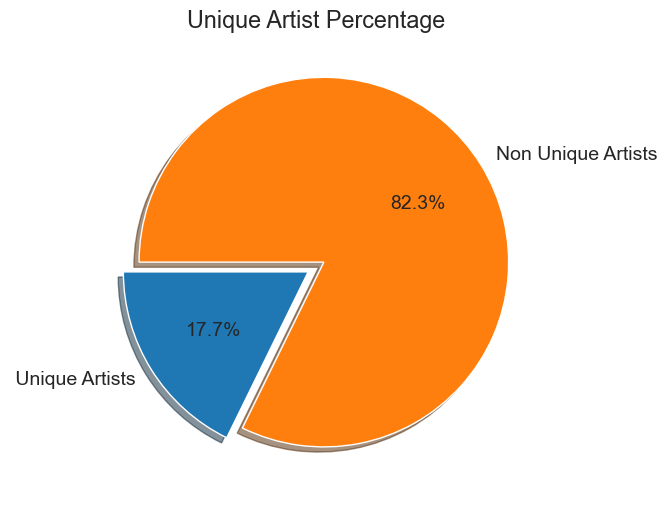

In [38]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists])
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage")
plt.show()
     

# 3.1.2 We can also check the top 10 unique artist we have.

In [39]:
top_10_artist_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
Pritam,10.147,609.081,213
Arijit Singh,9.230,553.781,181
Mitraz,2.797,167.705,90
Sachin-Jigar,2.757,165.175,61
Tanmoy Saikia,2.272,136.150,38
Sachet Tandon,2.238,133.929,59
Rito Riba,2.205,132.363,58
Vismay Patel,2.144,128.726,60
Tanishk Bagchi,2.130,127.268,44


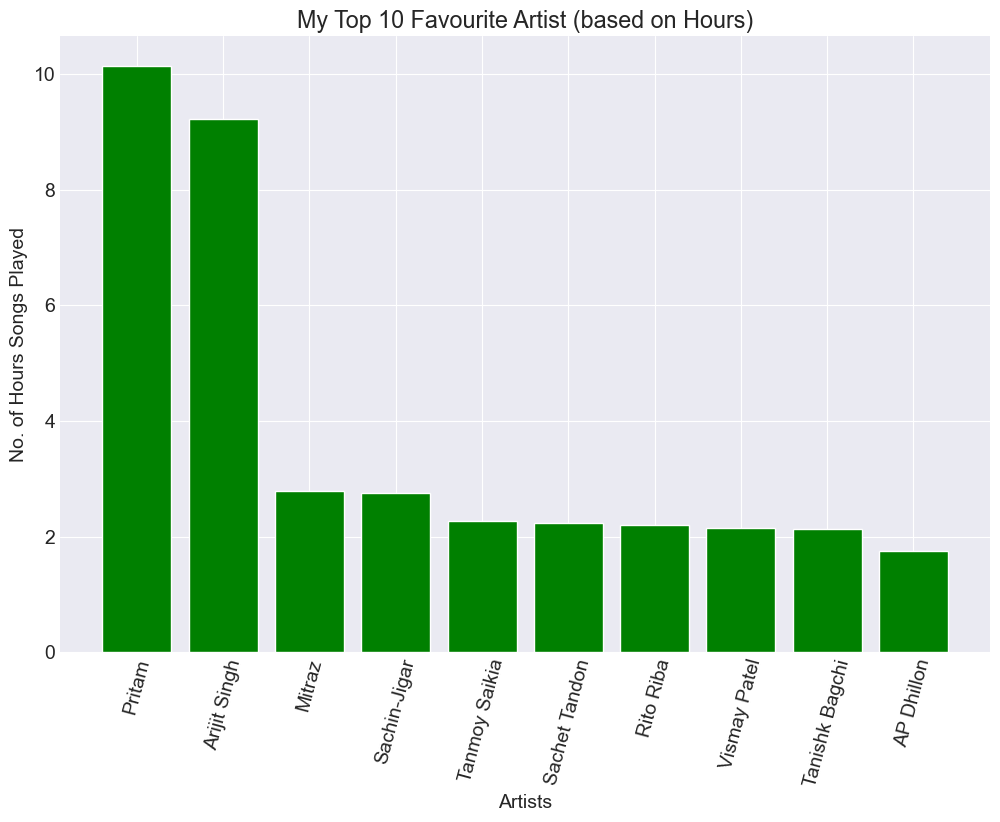

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

# 3.1.3 Top 10 Unique Artist (count) : Based on the number of count

In [41]:
top_10_artist_count_df = spotify_stream_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
Pritam,10.147,609.081,213
Arijit Singh,9.230,553.781,181
Mitraz,2.797,167.705,90
Sachin-Jigar,2.757,165.175,61
Vismay Patel,2.144,128.726,60
Sachet Tandon,2.238,133.929,59
Rito Riba,2.205,132.363,58
AP Dhillon,1.744,104.486,56
Tanishk Bagchi,2.130,127.268,44


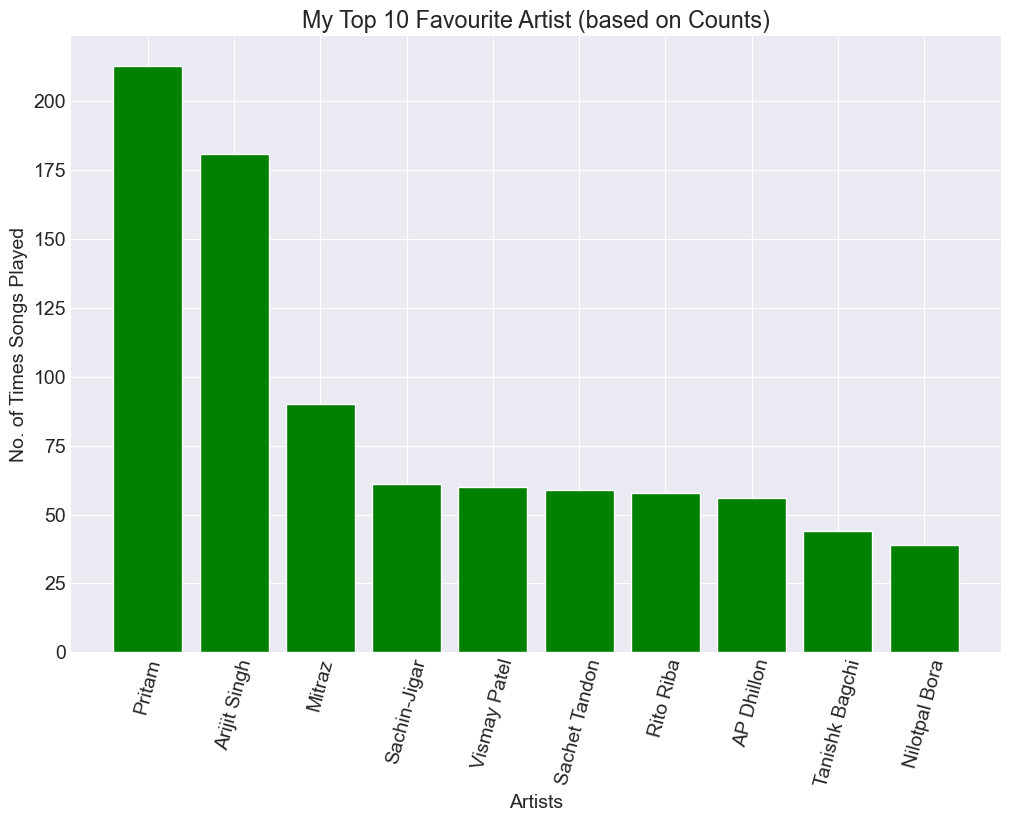

In [42]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);
     

# 3.2 Song Tracks (Exploration)

# 3.2.1 We can check what is the percentage of unique songs we have

In [43]:
unique_songs = spotify_stream_df["master_metadata_track_name"].nunique()
total_songs = spotify_stream_df["master_metadata_track_name"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

35.11396011396011

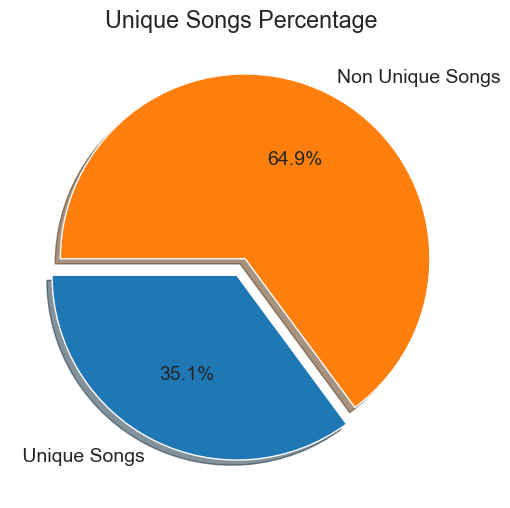

In [44]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

# 3.2.2 We can also check the top 10 unique songs we have

In [47]:
top_10_songs_time_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
     

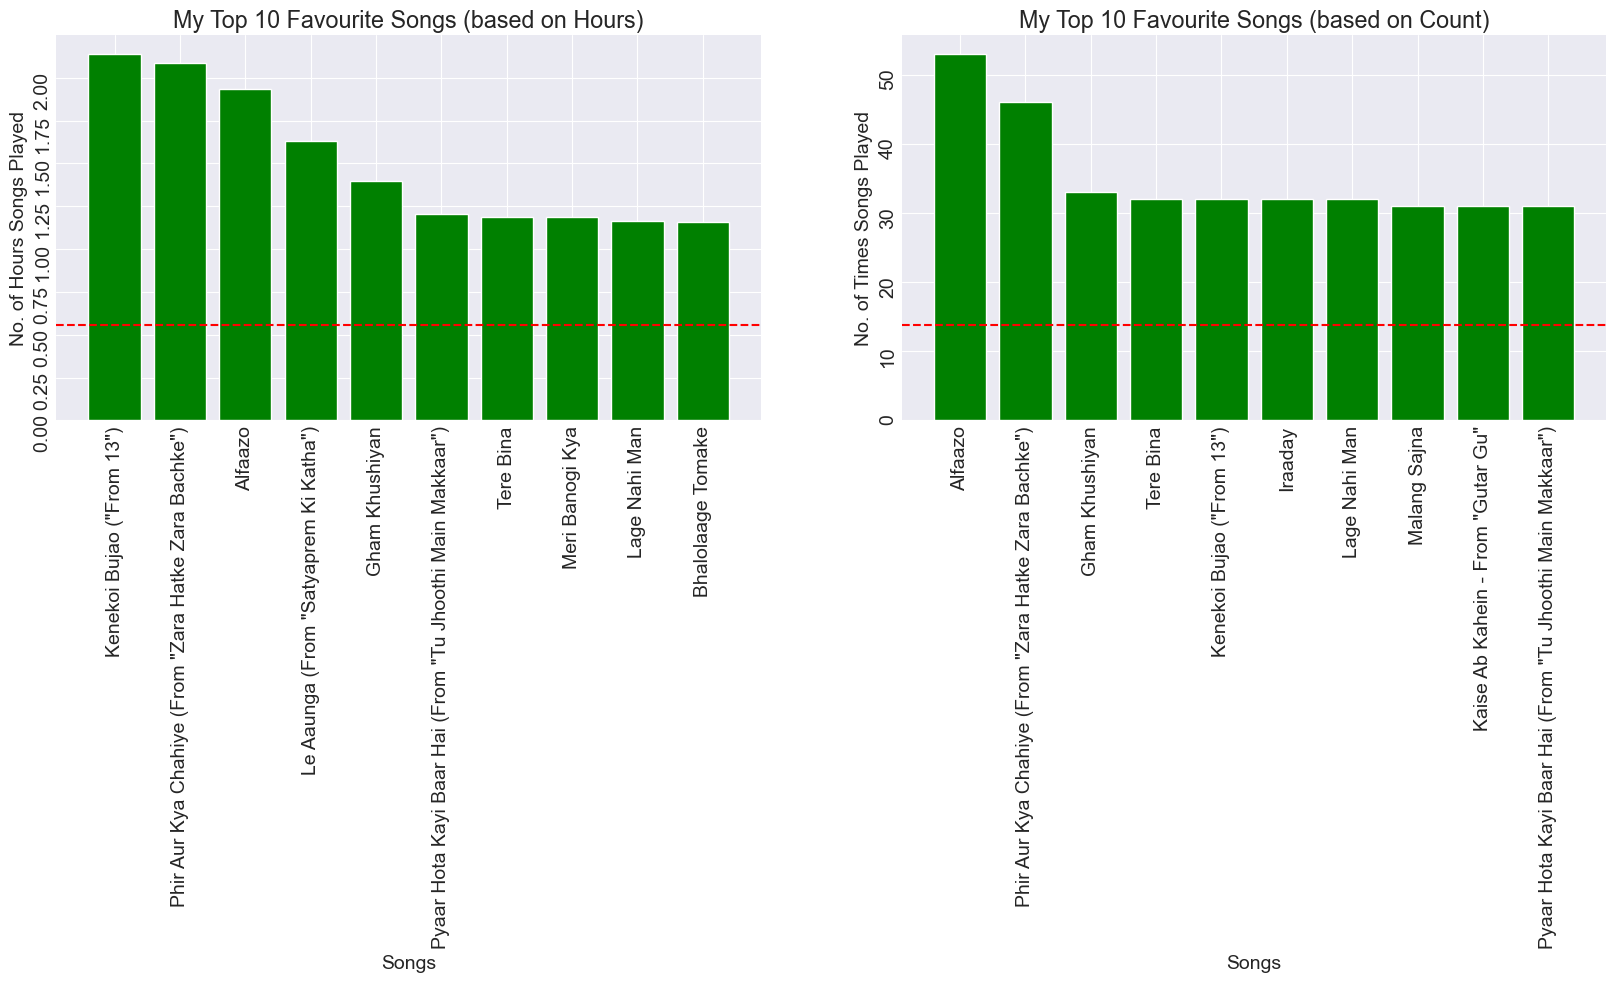

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Songs (based on Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

# 3.3 Day Wise Usage (Exploration)

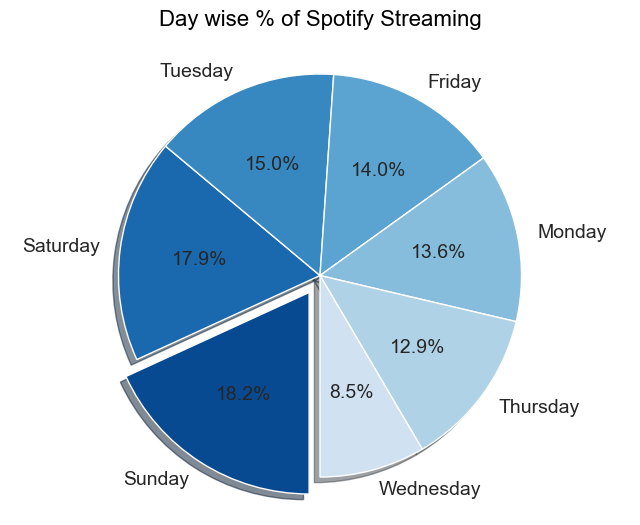

In [49]:
import matplotlib.cm as cm

day_name_counts = spotify_stream_df["day-name"].value_counts()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
colors = cm.Blues(np.linspace(0.9, 0.2, len(day_name_counts)))

# Get the maximum index
max_index = day_name_counts.argmax()

# Create an explode list
explode = [0] * len(day_name_counts)
explode[max_index] = 0.1

# Plot the pie chart
ax.pie(day_name_counts, labels=day_name_counts.index, colors=colors, autopct='%1.1f%%', startangle=-90,
       textprops={'fontsize': 14}, explode=explode, shadow=True, counterclock=False)

# Set the title and axis aspect ratio
ax.set_title('Day wise % of Spotify Streaming', pad=20, fontdict={'color': 'black', 'weight': 'normal', 'size': 16})
ax.axis('equal')

plt.show()


# 3.4 Average Usage over a day (Exploration)

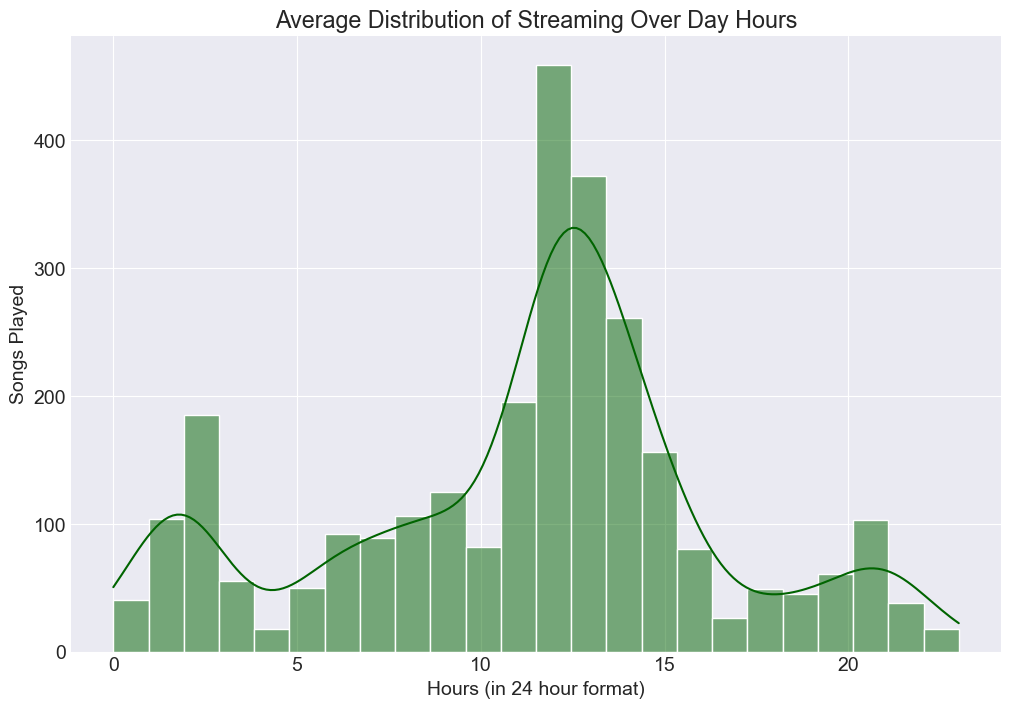

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");
     

With this histogram graph we can see about my average usage:

1.Maximum around 12-2 PM hour mark

2.Minimum around 9-11 PM hour mark

# 3.5 Average Usage In a Year (Exploration)

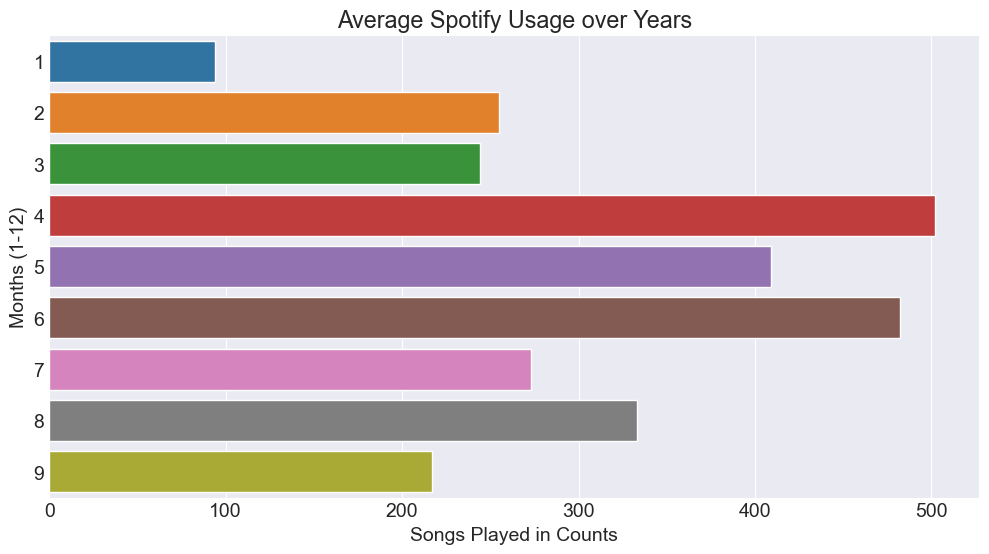

In [52]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

### How many hours did I spent on Spotify Streaming since the day I signed up for it

Here we want to know, how many hours I spend while streaming spotify since start.

In [53]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum()
time_spent_hours
     

98.90299999999999

For this we can simply do a summation of all the time I spent on listening to all songs.

-This comes out to be around **99 Hours.

### What is actual usage in percentage compared to to the total possible

Here we want to know, what is the percentage of time I spend on spotify.

This question might seem bit odd, but here we want to know that out of maximum possible hours since the start, how much time I actually spent streaming Spotify and we want to calculate that in percentage.

In [59]:
date_df = spotify_stream_df["Play-Time"]
time_difference = (date_df.iloc[2808] - date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference_hours = time_difference*24
time_difference_hours

6050.183333333333

### What is the average numbers of songs I played daily

In [60]:
total_songs = spotify_stream_df["master_metadata_track_name"].count()

In [61]:
time_difference

252.09097222222223

In [62]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

11.0

 Here we can see that on an average I played 11 songs per day

# Some More Observations

### On which day I played maximum number of songs via scatterplot

In [63]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date

In [64]:
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2023-05-24,67


Here we can see that I played most songs which is 67 Songs on 24th May 2023

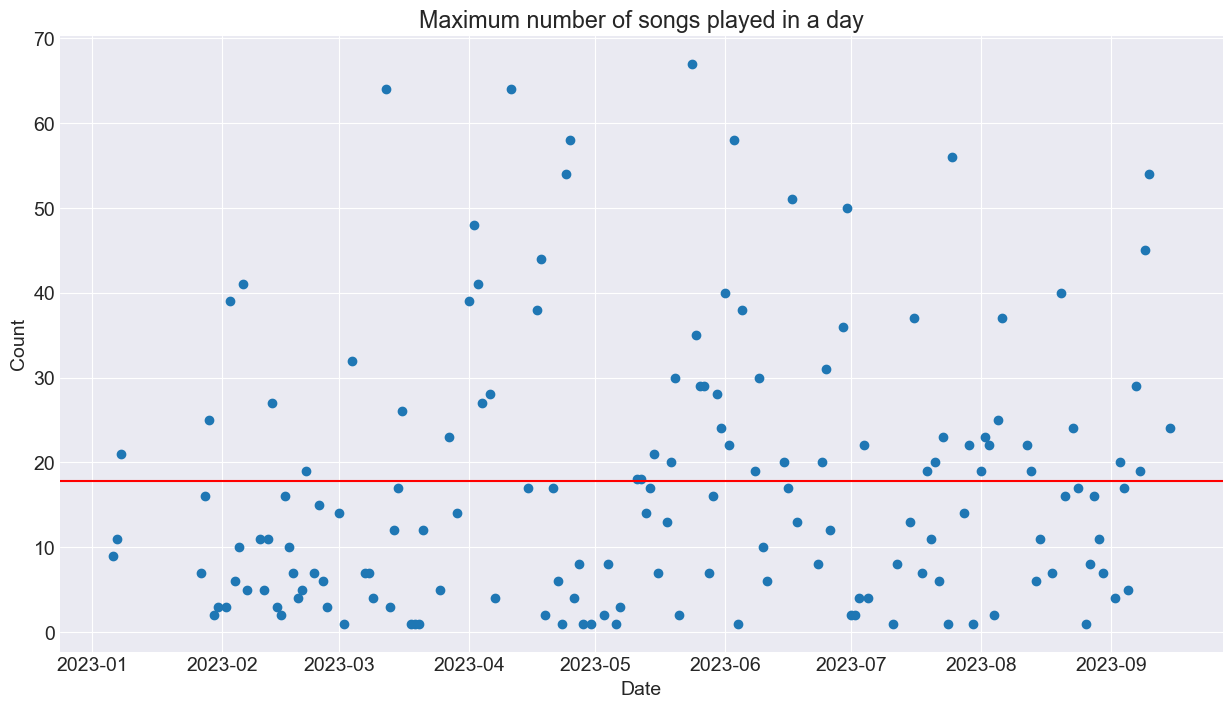

In [65]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");
     

# My favourite 100 Artist in word could

In [66]:
fav_artist = spotify_stream_df.groupby(["master_metadata_album_artist_name"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

master_metadata_album_artist_name
Pritam          213
Arijit Singh    181
Mitraz           90
Sachin-Jigar     61
Vismay Patel     60
               ... 
Ed Sheeran        6
Bayaan            6
Ash King          6
Badshah           6
Anson Seabra      6
Name: Count, Length: 100, dtype: int64

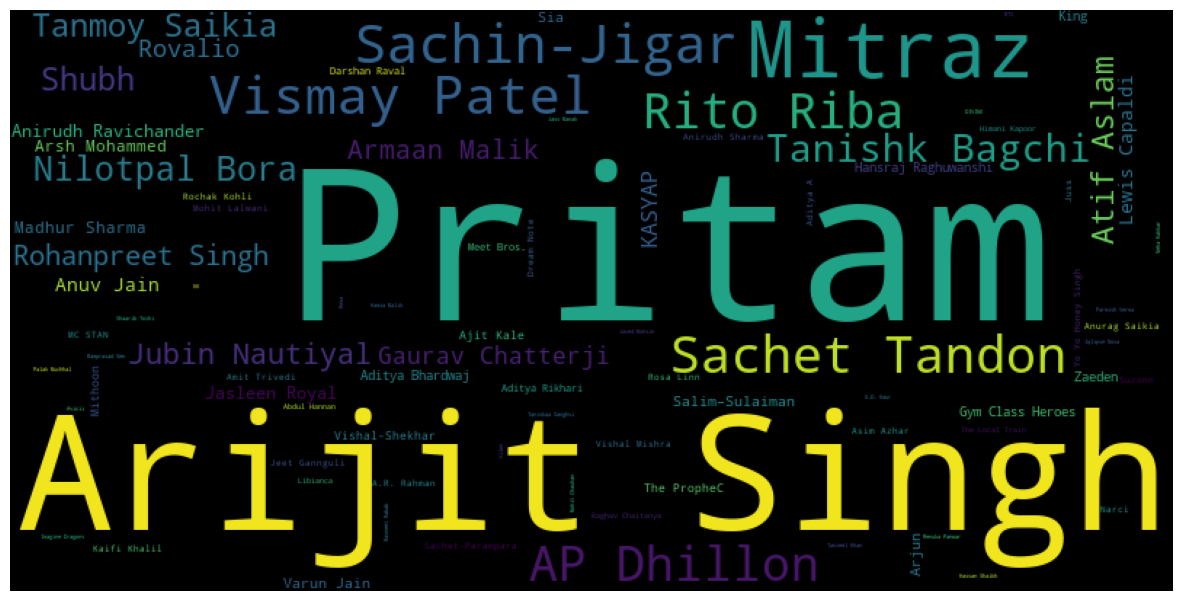

In [67]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_artist)
plot_cloud(wordcloud)

# My Favourite Artist playlist based on count of songs.

In [68]:
my_fav_artist_playlist = spotify_stream_df.groupby(["master_metadata_album_artist_name","master_metadata_track_name"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist
     

,,Count
master_metadata_album_artist_name,master_metadata_track_name,
Mitraz,Alfaazo,53
Sachin-Jigar,"Phir Aur Kya Chahiye (From ""Zara Hatke Zara Bachke"")",46
Rohanpreet Singh,Gham Khushiyan,33
Rovalio,Iraaday,32
Tanmoy Saikia,"Kenekoi Bujao (""From 13"")",32
...,...,...
Arijit Singh,Galtiyan,6
Dikshant,Aankhon Se Batana,6
Mohit Lalwani,Samay Samjhayega (Lofi),6


# My Favourite 100 Songs In Word Cloud.

To see what are top 100 songs that I usually listen to.

In [69]:
fav_songs = spotify_stream_df.groupby(["master_metadata_track_name"])["Count"].count()

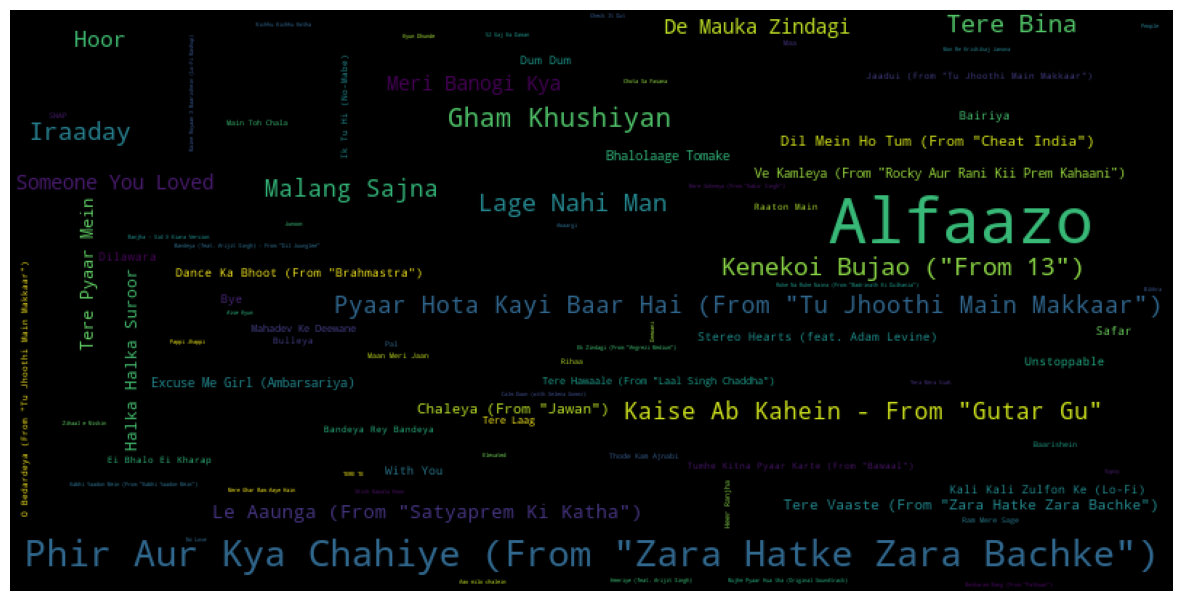

In [70]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_songs)
plot_cloud(wordcloud)

# Most Usage ( Active usage in a day over a week) via a heatmap.

In [71]:
active_usage = spotify_stream_df.groupby(['hours', 'day-name'])['master_metadata_album_artist_name'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'master_metadata_album_artist_name')
active_usage_pivot.head()

C:\Users\sawra\AppData\Local\Temp\ipykernel_19048\1012325590.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  active_usage_pivot = active_usage.pivot("hours", 'day-name', 'master_metadata_album_artist_name')


day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,23.0,NaN,NaN,2.0,15.0,NaN,NaN
1,20.0,23.0,7.0,2.0,16.0,22.0,14.0
2,29.0,52.0,17.0,29.0,33.0,21.0,4.0
3,10.0,10.0,1.0,17.0,2.0,7.0,8.0
4,1.0,NaN,NaN,6.0,NaN,11.0,NaN


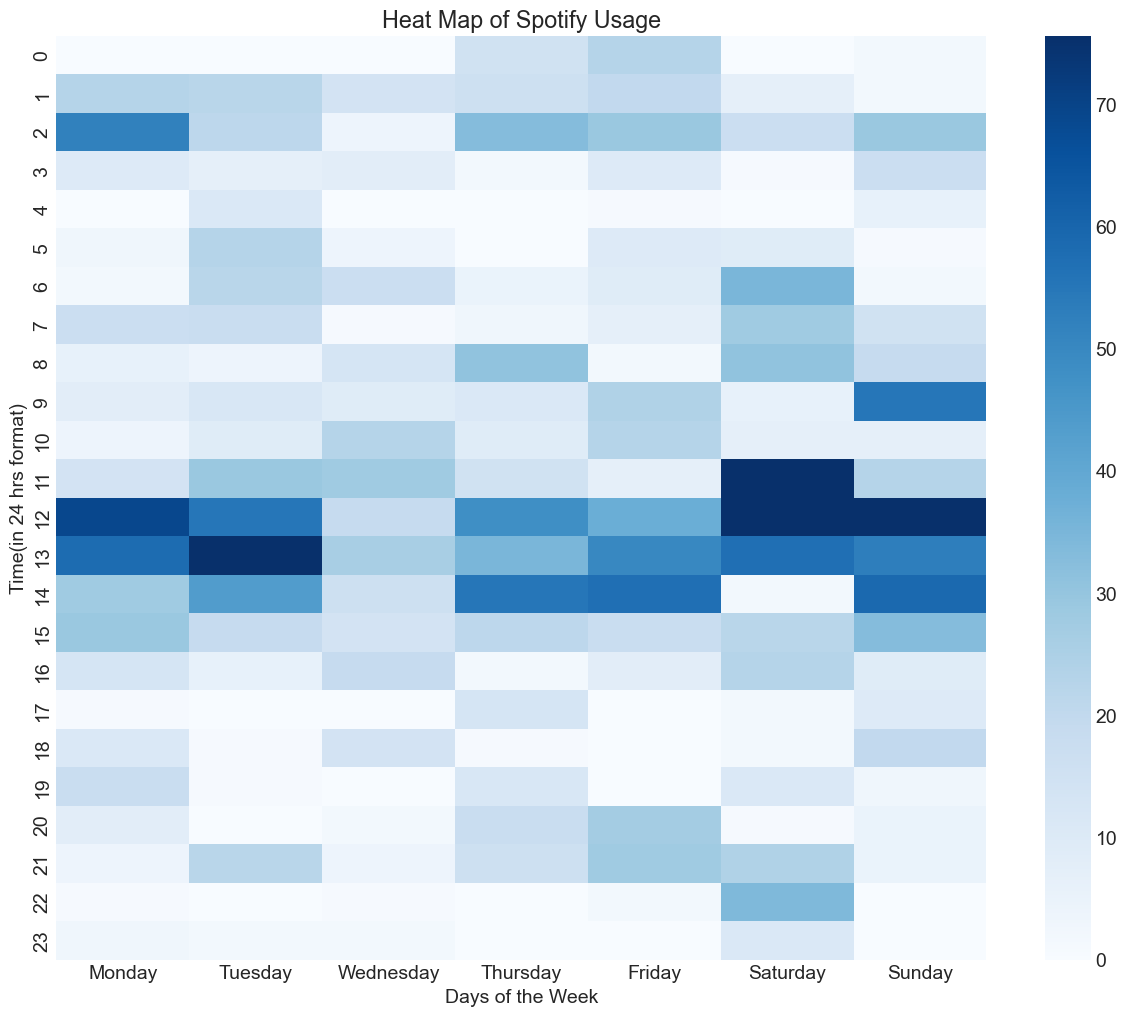

In [72]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

# Usage Analysis over a week via countplot

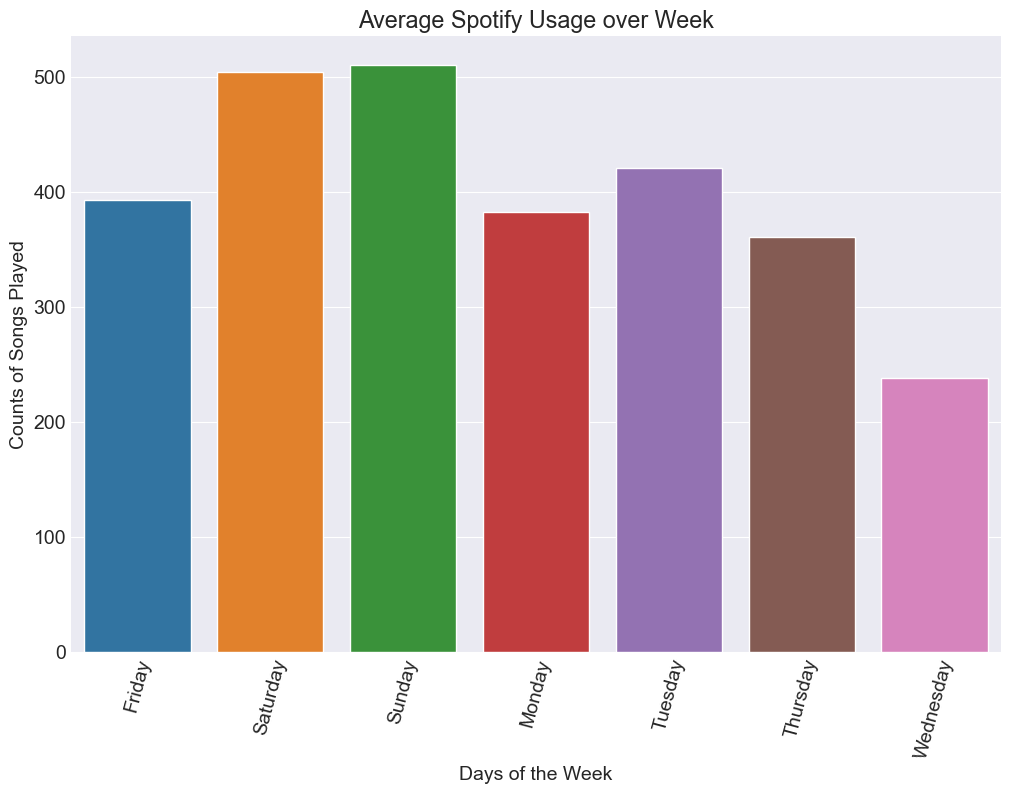

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

## What is the percentage of usage distribution between Weekday and Weekend

In [74]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,1795
True,1014


In [75]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend
     

,Count,Percentage
is_weekend,,
False,1795,63.901744
True,1014,36.098256


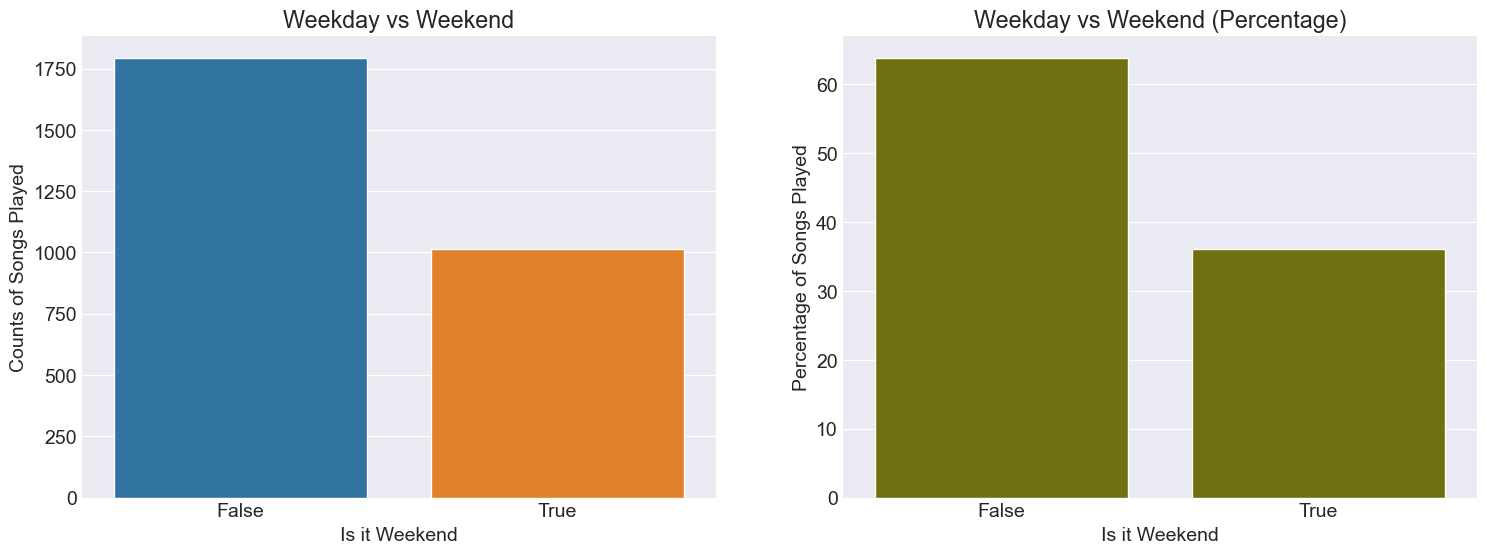

In [76]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");